# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key (make sure to change this)
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)




589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:

City_list =[]
Cloudiness=[]
Country =[]
Date =[]
Humidity =[]
Lat =[]
Lng =[] 
Max_temp =[]
wind_speed =[]

base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = (f"{base_url}&appid={api_key}&q=")
print ("Beginning Data Retrieval")
print ("------------------------")

for city in cities:
    try: 
        response = requests.get(query_url + city).json()
        Cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found, skipping...")
        continue
    
    City_list.append(city)
    Country.append(response['sys']['country'])
    Date.append (response['dt'])
    Humidity.append(response['main']['humidity'])
    Lat.append(response ['coord']['lat'])
    Lng.append(response ['coord']['lon'])
    Max_temp.append(response['main']['temp_max'])
    wind_speed.append(response['wind'] ['speed'])

    print (f'Processing record {len(City_list)} of set 1 | {city}') 

print ("------------------------")
print ("data retrieval complete")
print ("------------------------")

Beginning Data Retrieval
------------------------
Processing record 1 of set 1 | cabo san lucas
Processing record 2 of set 1 | ambam
Processing record 3 of set 1 | bluff
Processing record 4 of set 1 | rikitea
Processing record 5 of set 1 | mar del plata
Processing record 6 of set 1 | lavrentiya
Processing record 7 of set 1 | cayenne
Processing record 8 of set 1 | chokurdakh
Processing record 9 of set 1 | hermanus
Processing record 10 of set 1 | albany
Processing record 11 of set 1 | point pleasant
Processing record 12 of set 1 | kavaratti
Processing record 13 of set 1 | punta arenas
Processing record 14 of set 1 | grand gaube
Processing record 15 of set 1 | victoria
Processing record 16 of set 1 | yellowknife
Processing record 17 of set 1 | sibolga
City not found, skipping...
Processing record 18 of set 1 | hobart
Processing record 19 of set 1 | ushuaia
City not found, skipping...
Processing record 20 of set 1 | butaritari
City not found, skipping...
Processing record 21 of set 1 | que

Processing record 179 of set 1 | chuy
Processing record 180 of set 1 | mpwapwa
Processing record 181 of set 1 | college
Processing record 182 of set 1 | taoudenni
Processing record 183 of set 1 | sinnamary
Processing record 184 of set 1 | gombong
Processing record 185 of set 1 | kamaishi
Processing record 186 of set 1 | malgrat de mar
City not found, skipping...
Processing record 187 of set 1 | araouane
Processing record 188 of set 1 | port augusta
Processing record 189 of set 1 | awjilah
Processing record 190 of set 1 | bogale
Processing record 191 of set 1 | kahului
Processing record 192 of set 1 | yulara
Processing record 193 of set 1 | tura
Processing record 194 of set 1 | bambous virieux
Processing record 195 of set 1 | monrovia
Processing record 196 of set 1 | rivera
Processing record 197 of set 1 | praia
Processing record 198 of set 1 | cururupu
Processing record 199 of set 1 | joshimath
Processing record 200 of set 1 | lorengau
Processing record 201 of set 1 | mecca
Processing 

Processing record 362 of set 1 | sunndalsora
Processing record 363 of set 1 | san fernando
Processing record 364 of set 1 | necochea
Processing record 365 of set 1 | puerto varas
Processing record 366 of set 1 | banda aceh
Processing record 367 of set 1 | vilyuysk
Processing record 368 of set 1 | vylkove
Processing record 369 of set 1 | ambilobe
Processing record 370 of set 1 | svetlaya
Processing record 371 of set 1 | ixtlahuacan del rio
Processing record 372 of set 1 | namatanai
Processing record 373 of set 1 | margate
Processing record 374 of set 1 | nacala
Processing record 375 of set 1 | wick
Processing record 376 of set 1 | mana
Processing record 377 of set 1 | hamilton
Processing record 378 of set 1 | unai
Processing record 379 of set 1 | odessa
City not found, skipping...
Processing record 380 of set 1 | port-gentil
Processing record 381 of set 1 | kauhajoki
Processing record 382 of set 1 | las vegas
Processing record 383 of set 1 | gasa
Processing record 384 of set 1 | batuan


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
city_data = pd.DataFrame({"City": City_list, "Cloudiness":Cloudiness , "Country": Country, "Date": Date, 
             "Humidity": Humidity, "Lat": Lat, "Lng": Lng, "Max Temp":Max_temp , "Wind Speed": wind_speed })

city_data.to_csv("cities.csv")
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cabo san lucas,24,MX,1553758240,38,22.89,-109.91,291.480,5.56
1,ambam,0,NG,1553758483,19,9.52,8.32,306.127,4.76
2,bluff,92,AU,1553758483,97,-23.58,149.07,294.877,5.51
3,rikitea,48,PF,1553758484,100,-23.12,-134.97,298.127,1.31
4,mar del plata,20,AR,1553758484,100,-46.43,-67.52,280.927,3.26


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

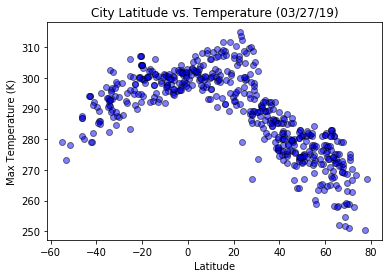

In [25]:
plt.scatter(city_data["Lat"], city_data ["Max Temp"], marker="o", facecolors="blue", edgecolors="black",
             alpha=0.5)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.title('City Latitude vs. Temperature (03/27/19)')
plt.savefig("lat_vs_temp.png")

#### Latitude vs. Humidity Plot

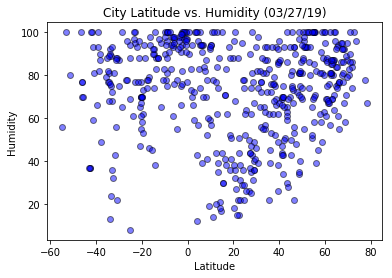

In [26]:
plt.scatter(city_data["Lat"], city_data ["Humidity"], marker="o", facecolors="blue", edgecolors="black",
             alpha=0.5)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity (03/27/19)')
plt.savefig("lat_vs_humidity.png")

#### Latitude vs. Cloudiness Plot

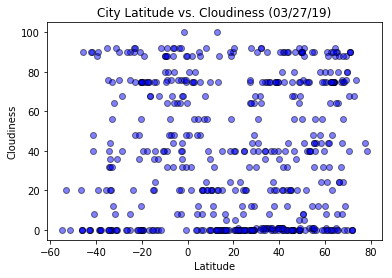

In [27]:
plt.scatter(city_data["Lat"], city_data ["Cloudiness"], marker="o", facecolors="blue", edgecolors="black",
             alpha=0.5)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness (03/27/19)')
plt.savefig("lat_vs_cloudiness.png")

#### Latitude vs. Wind Speed Plot

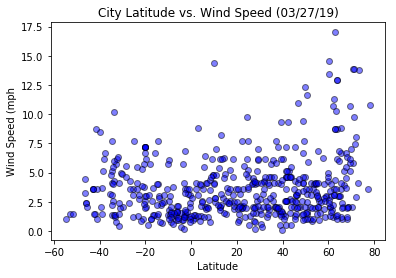

In [28]:
plt.scatter(city_data["Lat"], city_data ["Wind Speed"], marker="o", facecolors="blue", edgecolors="black",
             alpha=0.5)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title('City Latitude vs. Wind Speed (03/27/19)')
plt.savefig("lat_vs_windSpeed.png")